In [76]:
import numpy as np
from matplotlib import pyplot as plt

In [77]:
words_path = "q4/data/words_stream.txt"
counts_path = "q4/data/counts.txt"
hash_path = "q4/data/hash_params.txt"

gamma = np.exp(-5)
eps = np.exp(1) * (10 ** -4)

In [78]:
def hash_fun(a, b, x):
    p = 123457
    n_buckets = np.ceil(np.exp(1) / eps)
    y = x % p
    hash_val = (a*y + b) % p
    return int(hash_val % n_buckets)

In [79]:
with open(hash_path, 'r') as file:
    hash_params = [tuple(map(int, line.strip().split())) for line in file]
    
hash_params

[(3, 1561), (17, 277), (38, 394), (61, 13), (78, 246)]

In [80]:
rows = int(np.ceil(np.log(1 / gamma)))
cols = int(np.ceil(np.exp(1) / eps)) 
counts = np.zeros((rows, cols))
counts.shape

(5, 10000)

In [81]:
with open(words_path, 'r') as file:
    c = 0
    for line in file:
        if c % (10 ** 6) == 0:
            print(f"Processed {c / (10 ** 6)} millions words")
        c+=1

        number = int(line.strip())
        for i, (a, b) in enumerate(hash_params):
            col_index = hash_fun(a, b, number)
            counts[i, col_index] += 1

Processed 0.0 millions words
Processed 1.0 millions words
Processed 2.0 millions words
Processed 3.0 millions words
Processed 4.0 millions words
Processed 5.0 millions words
Processed 6.0 millions words
Processed 7.0 millions words
Processed 8.0 millions words
Processed 9.0 millions words
Processed 10.0 millions words
Processed 11.0 millions words
Processed 12.0 millions words
Processed 13.0 millions words
Processed 14.0 millions words
Processed 15.0 millions words
Processed 16.0 millions words
Processed 17.0 millions words
Processed 18.0 millions words
Processed 19.0 millions words
Processed 20.0 millions words
Processed 21.0 millions words
Processed 22.0 millions words
Processed 23.0 millions words
Processed 24.0 millions words
Processed 25.0 millions words
Processed 26.0 millions words
Processed 27.0 millions words
Processed 28.0 millions words
Processed 29.0 millions words
Processed 30.0 millions words
Processed 31.0 millions words
Processed 32.0 millions words
Processed 33.0 milli

In [83]:
np.save("counts.npy", counts)

In [84]:
counts = np.load("counts.npy")

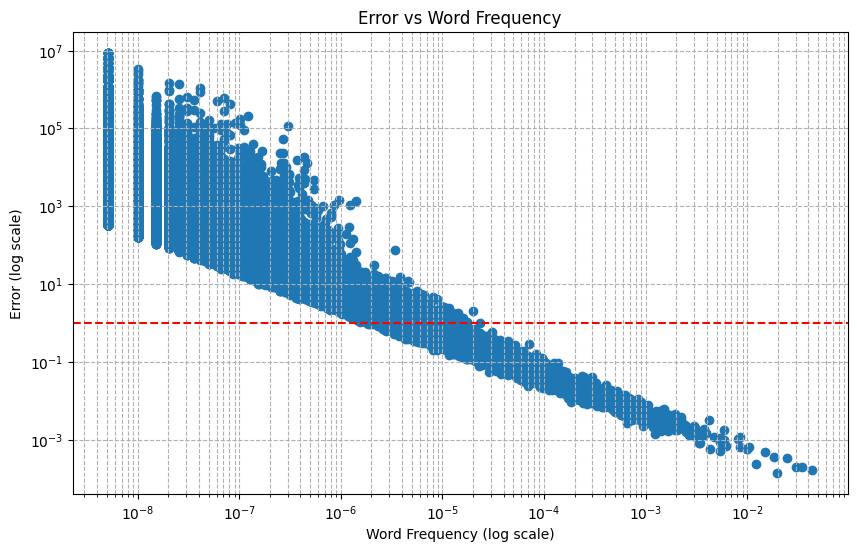

In [85]:
real_counts = {}
with open(counts_path, 'r') as file:
    for line in file:
        word_id, count = map(int, line.strip().split())
        real_counts[word_id] = count

approx_counts = {}
errors = []
frequencies = []
total_words = sum(real_counts.values())

for word_id, real_count in real_counts.items():
    approx_count = min(counts[i, hash_fun(a, b, word_id)] for i, (a, b) in enumerate(hash_params))
    approx_counts[word_id] = approx_count
    error = (approx_count - real_count) / real_count
    errors.append(error)
    frequencies.append(real_count / total_words)

sorted_indices = np.argsort(frequencies)
sorted_frequencies = np.array(frequencies)[sorted_indices]
sorted_errors = np.array(errors)[sorted_indices]

plt.figure(figsize=(10, 6))
plt.scatter(frequencies, errors)
plt.axhline(y=1, color='r', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Word Frequency (log scale)')
plt.ylabel('Error (log scale)')
plt.title('Error vs Word Frequency')
plt.grid(True, which="both", ls="--")
plt.show()